In [1]:
import pandas as pd

In [7]:
df = pd.read_csv("/home/prital/Hackathon/cleaned_dataset.csv")

In [4]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  #bin edges
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50','51-60','61-70', '71-80','81-90','90+']  

df['age_group'] = pd.cut(df['patient_age'], bins=age_bins, labels=age_labels, right=False)

print(df[['patient_age', 'age_group']].head(20))

    patient_age age_group
0            84     81-90
1            62     61-70
2            43     41-50
3            45     41-50
4            55     51-60
5            66     61-70
6            51     51-60
7            60     61-70
8            82     81-90
9            64     61-70
10           67     61-70
11           66     61-70
12           58     51-60
13           82     81-90
14           58     51-60
15           62     61-70
16           41     41-50
17           83     81-90
18           75     71-80
19           60     61-70


In [29]:
df.describe()

,patient_id,patient_zip3,patient_age,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,...,Ozone,PM25,N02,DiagPeriodL90D,bmi_filled,merged_bmi,patient_income,bmi_cluster,age_cluster,income_cluster
count,12906.000000,12906.000000,12906.000000,12906.000000,12906.000000,12906.000000,12906.000000,12906.000000,12906.000000,12906.000000,...,12906.000000,12906.000000,12906.000000,12906.000000,12906.000000,12906.000000,12906.000000,12906.000000,12906.000000,12906.000000
mean,547381.196033,573.754300,59.183326,20744.441237,1581.950419,40.502259,11.122784,12.945265,13.290376,12.862036,...,39.822352,7.475221,16.098988,0.624516,29.052048,29.031433,191359.248876,0.666124,1.214939,1.068495
std,260404.959974,275.447534,13.335216,13886.365702,2966.190375,4.036806,1.512318,1.923900,3.353973,2.324831,...,3.555491,1.514794,5.835933,0.484266,1.919170,3.686851,43353.164627,0.909306,0.855538,0.909694
min,100063.000000,101.000000,18.000000,635.545455,0.916667,20.600000,0.000000,6.314286,5.925000,1.500000,...,30.939316,2.636008,2.760371,0.000000,21.770614,14.000000,0.000000,0.000000,0.000000,0.000000
25%,321517.000000,331.000000,50.000000,9463.896552,171.857143,37.129825,10.160000,11.741176,11.013415,11.292105,...,37.698880,6.651215,11.280694,0.000000,28.242939,27.228774,162745.000000,0.000000,0.000000,0.000000
50%,543522.000000,554.000000,59.000000,19154.190480,700.337500,40.639344,11.039216,12.923944,12.538095,12.442647,...,39.108249,7.686577,15.589148,1.000000,29.052048,28.816609,183405.000000,0.000000,1.000000,1.000000
75%,772671.750000,846.000000,67.000000,30021.278690,1666.515385,42.934783,12.190000,14.019767,14.971053,14.026667,...,41.111066,8.276922,20.801880,1.000000,29.593527,30.765266,213250.000000,2.000000,2.000000,2.000000
max,999896.000000,999.000000,91.000000,71374.131580,21172.000000,54.570000,17.675000,35.300000,62.100000,25.471429,...,52.237210,11.169408,31.504775,1.000000,38.994355,85.000000,368922.000000,2.000000,2.000000,2.000000


In [28]:
import pandas as pd


bmi_bins = [0, 18.5, 25, 30, float('inf')]  
bmi_labels = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']  

df['bmi_category'] = pd.cut(df['bmi_filled'], bins=bmi_bins, labels=bmi_labels, right=False)

print(df[['bmi_filled', 'bmi_category']].head())


   bmi_filled bmi_category
0   30.098605        Obese
1   29.052048   Overweight
2   29.052048   Overweight
3   27.445879   Overweight
4   26.759150   Overweight


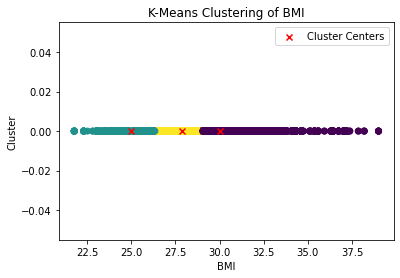

   bmi_filled  bmi_cluster
0   30.098605            0
1   29.052048            0
2   29.052048            0
3   27.445879            2
4   26.759150            2


In [10]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

bmi_data = df[['bmi_filled']]

num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)

kmeans.fit(bmi_data)

cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_


df['bmi_cluster'] = cluster_labels

# Visualize
plt.scatter(df['bmi_filled'], [0] * len(df), c=df['bmi_cluster'], cmap='viridis')
plt.scatter(cluster_centers, [0] * num_clusters, marker='x', color='red', label='Cluster Centers')
plt.xlabel('BMI')
plt.ylabel('Cluster')
plt.title('K-Means Clustering of BMI')
plt.legend()
plt.show()

print(df[['bmi_filled', 'bmi_cluster']].head())


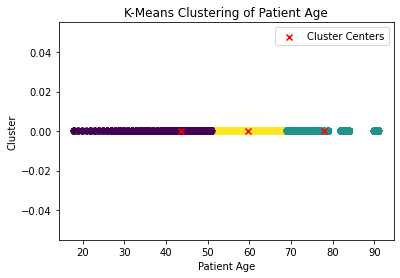

   patient_age  age_cluster
0           84            1
1           62            2
2           43            0
3           45            0
4           55            2


In [11]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

age_data = df[['patient_age']]

num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)

kmeans.fit(age_data)

cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

df['age_cluster'] = cluster_labels

# Visualize 
plt.scatter(df['patient_age'], [0] * len(df), c=df['age_cluster'], cmap='viridis')
plt.scatter(cluster_centers, [0] * num_clusters, marker='x', color='red', label='Cluster Centers')
plt.xlabel('Patient Age')
plt.ylabel('Cluster')
plt.title('K-Means Clustering of Patient Age')
plt.legend()
plt.show()

print(df[['patient_age', 'age_cluster']].head())


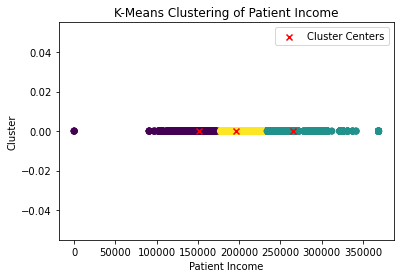

   patient_income  income_cluster
0          141003               0
1          246510               1
2          215720               2
3          287354               1
4          159516               0


In [12]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


income_data = df[['patient_income']]


num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)

kmeans.fit(income_data)

cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

df['income_cluster'] = cluster_labels

# Visualize
plt.scatter(df['patient_income'], [0] * len(df), c=df['income_cluster'], cmap='viridis')
plt.scatter(cluster_centers, [0] * num_clusters, marker='x', color='red', label='Cluster Centers')
plt.xlabel('Patient Income')
plt.ylabel('Cluster')
plt.title('K-Means Clustering of Patient Income')
plt.legend()
plt.show()

print(df[['patient_income', 'income_cluster']].head())


In [22]:

cluster_diagnosis_df = df[['age_cluster', 'DiagPeriodL90D']]


In [23]:
cancer_cases_in_clusters = cluster_diagnosis_df.groupby(['age_cluster', 'DiagPeriodL90D']).size().unstack(fill_value=0)
print(cancer_cases_in_clusters)


DiagPeriodL90D     0     1
age_cluster               
0               1479  2155
1                977  1887
2               2390  4018


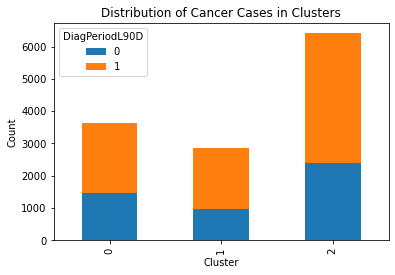

In [24]:
cancer_cases_in_clusters.plot(kind='bar', stacked=True)
plt.title('Distribution of Cancer Cases in Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


In [25]:
cluster_counts = cluster_diagnosis_df['age_cluster'].value_counts()
cancer_proportion_in_clusters = cancer_cases_in_clusters / cluster_counts[:, None]
print(cancer_proportion_in_clusters)


DiagPeriodL90D         0         1
age_cluster                       
0               0.230805  0.336298
1               0.268850  0.519263
2               0.834497  1.402933


/tmp/ipykernel_55996/64830912.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cancer_proportion_in_clusters = cancer_cases_in_clusters / cluster_counts[:, None]


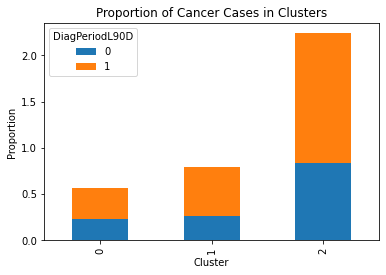

In [26]:
cancer_proportion_in_clusters.plot(kind='bar', stacked=True)
plt.title('Proportion of Cancer Cases in Clusters')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.show()


In [27]:
from scipy.stats import chi2_contingency

chi2, p, _, _ = chi2_contingency(cancer_cases_in_clusters)
print(f'Chi-Square Value: {chi2}, p-value: {p}')


Chi-Square Value: 29.96810755615168, p-value: 3.108194070750822e-07
